In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pickle
from PIL import Image

In [17]:
! mkdir -p data
! [ -d data/cifar-10-batches-py ] || wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz && tar xzf cifar-10-python.tar.gz -C data
! rm cifar-10-python.tar.gz

--2018-10-11 13:13:35--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  1.91MB/s    in 2m 1s   

2018-10-11 13:15:36 (1.35 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [7]:
img_size = 32
channels = 3

In [100]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

In [73]:
def _convert_images(raw):
    images = raw.reshape([-1, channels, img_size, img_size])
    images = images.transpose([0, 2, 3, 1])
    return images

In [83]:
def load_data(filename):
    data = unpickle(filename)

    raw_images = data[b'data']
    cls = np.array(data[b'labels'])

    images = _convert_images(raw_images)

    return images, cls

In [142]:
def load_class_names():
    names = unpickle('data/cifar-10-batches-py/batches.meta')[b'label_names']
    names = list(map(lambda n: n.decode(), names))
    names_map = {i: name for i, name in enumerate(names)}
    return names, names_map

In [144]:
class_names, names_map = load_class_names()
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [160]:
images, cls = load_data(f'data/cifar-10-batches-py/data_batch_1')

rand_idx = np.random.randint(len(images))
rand_img = images[rand_idx]
label = labels[rand_idx]

names_map[label]

'frog'

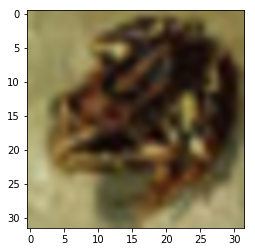

In [161]:
plt.imshow(rand_img, interpolation='spline16')

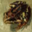

In [162]:
img = Image.fromarray(rand_img, 'RGB')
img

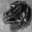

In [163]:
img.convert('L')